In [1]:
#etl_demo.ipynb

# ETL Portfolio Project - Demo Notebook

This notebook servces as a guide to the ETL project detailed in the repo in which you are currently located.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

### Part 1: Run the ETL pipeline script

In [5]:
from etl.pipeline import run_etl

print("Running ETL pipeline...")
run_etl()
print("ETL pipeline completed.")

Running ETL pipeline...
Data Loaded into Sqlite - Good job buddy
ETL pipeline completed.


### Part 2: Connect to the database

In [8]:
engine = create_engine("sqlite:///data/stock_data.db")

In [17]:
# List all tables in the database
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", engine)
print("Tables in stock_data.db:")
display(tables)


Tables in stock_data.db:


,name
0,clients
1,accounts
2,transactions
3,securities
4,all_prices
5,holdings


### Section 3: Explore tables

In [18]:
df_clients = pd.read_sql("SELECT * FROM clients", engine)
df_accounts = pd.read_sql("SELECT * FROM accounts", engine)
df_holdings = pd.read_sql("SELECT * FROM holdings", engine)

print("Clients:")
display(df_clients.head())

print("Accounts:")
display(df_accounts.head())

print("Holdings:")
display(df_holdings.head())


Clients:


,client_id,name
0,1,Carlos Pineda
1,2,Kace Heiner
2,3,Stephan A. Smith


Accounts:


,account_id,client_id,account_type
0,101,1,Brokerage
1,102,1,Retirement
2,201,2,Brokerage
3,301,3,Brokerage


Holdings:


,account_id,ticker,quantity,avg_cost,latest_price,market_value
0,101,AAPL,10,130.0,160.346527,1603.465271
1,101,MSFT,5,240.0,278.632538,1393.162689
2,102,NVDA,8,100.0,NaN,NaN
3,201,AAPL,15,135.0,160.346527,2405.197906
4,301,MSFT,12,250.0,278.632538,3343.590454


### Section 4: Portfolio Value by Client

Portfolio Value by Client:


,name,total_value
0,Stephan A. Smith,3343.59
1,Carlos Pineda,2996.63
2,Kace Heiner,2405.20


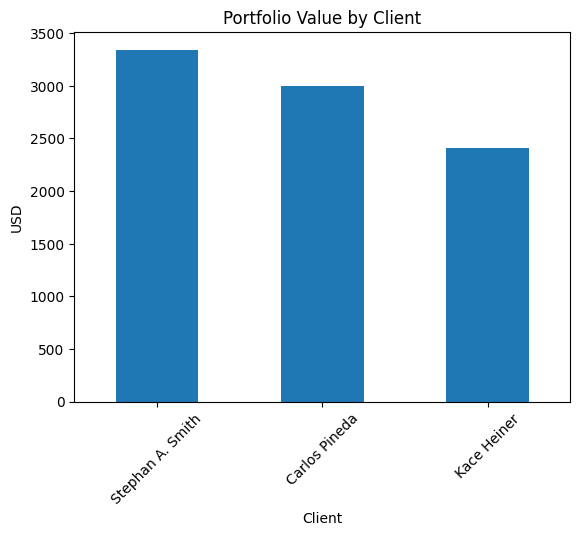

In [14]:
query = """
SELECT c.name, ROUND(SUM(h.market_value), 2) AS total_value
FROM clients c
JOIN accounts a ON c.client_id = a.client_id
JOIN holdings h ON a.account_id = h.account_id
GROUP BY c.client_id
ORDER BY total_value DESC;
"""

df_portfolio = pd.read_sql(query, engine)

print("Portfolio Value by Client:")
display(df_portfolio)

# Bar chart
df_portfolio.plot(x="name", y="total_value", kind="bar", legend=False)
plt.title("Portfolio Value by Client")
plt.ylabel("USD")
plt.xlabel("Client")
plt.xticks(rotation=45)
plt.show()

### Section 5: Top Holdings Across All Clients

Top 10 Holdings Across All Clients:


,ticker,total_value
0,MSFT,4736.753143
1,AAPL,4008.663177
2,NVDA,NaN


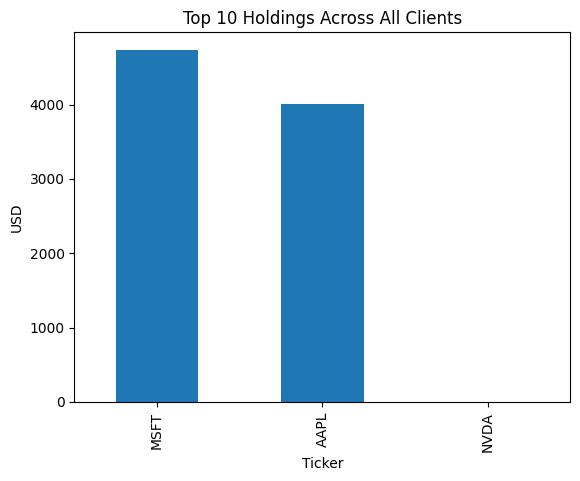

In [19]:
query_top = """
SELECT h.ticker, SUM(h.market_value) AS total_value
FROM holdings h
GROUP BY h.ticker
ORDER BY total_value DESC
LIMIT 10;
"""

df_top_holdings = pd.read_sql(query_top, engine)

print("Top 10 Holdings Across All Clients:")
display(df_top_holdings)


df_top_holdings.plot(x="ticker", y="total_value", kind="bar", legend=False)
plt.title("Top 10 Holdings Across All Clients")
plt.ylabel("USD")
plt.xlabel("Ticker")
plt.show()

### Section 6: Individual Client Portfolio Diversification

Holdings for Carlos Pineda:


,ticker,market_value
0,AAPL,1603.465271
1,MSFT,1393.162689
2,NVDA,NaN


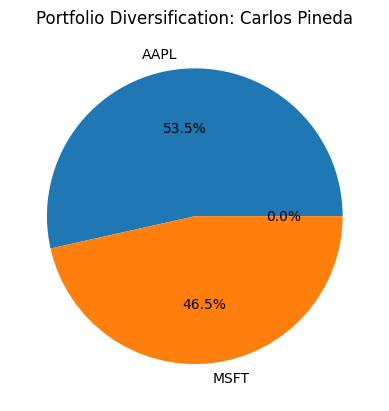

In [21]:

#First client in the dataset (happens to be Carlos Pineda)
client_id = df_clients.iloc[0]["client_id"]
client_name = df_clients.iloc[0]["name"]

query_client = f"""
SELECT h.ticker, h.market_value
FROM holdings h
JOIN accounts a ON h.account_id = a.account_id
WHERE a.client_id = {client_id};
"""

df_client_holdings = pd.read_sql(query_client, engine)
print(f"Holdings for {client_name}:")
display(df_client_holdings)

# Pie chart of portfolio diversification
df_client_holdings.set_index("ticker").plot.pie(
    y="market_value", autopct="%.1f%%", legend=False
)
plt.title(f"Portfolio Diversification: {client_name}")
plt.ylabel("")
plt.show()